problems
steo 1 - clean miledge, engen and powers to remove units and make it numerical column type .
step 2 - screate a brand column from name column and drop name column from dataset.
step 3 - convert kmkg rows to kmpl .
step 4 - drop the column new_price column.


Exploratory data analysis

- import neccessary libraries
- import data and create data frame
- data understanding (checking nulls, duplicate,etc)
- Data Reduction (remove unnessary column )
 - Feature Engineering (creating new columns from existing column)
- Data wrangling / data cleaning (cleaning raw level data)
- EDA 
    -unvariate analysis
    -Bivariant analysis
    - Multivariate analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\jadha\\Downloads\\used_cars_data.csv")
df.head()

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [3]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [4]:
# check null
df.isnull().sum()/len(df)*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [5]:
#check Duplicates
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

# Data Reduction

In [6]:
# drop unnecessary column
df.drop(columns=["S.No.","New_Price"],inplace= True)

In [7]:
df

Name    Location  Year  \
0                                Maruti Wagon R LXI CNG      Mumbai  2010   
1                      Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                          Honda Jazz V     Chennai  2011   
3                                     Maruti Ertiga VDI     Chennai  2012   
4                       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...                                                 ...         ...   ...   
7248                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
7249                             Volkswagen Polo GT TSI      Mumbai  2015   
7250                             Nissan Micra Diesel XV     Kolkata  2012   
7251                             Volkswagen Polo GT TSI        Pune  2013   
7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 72000       CNG       Manual      First  26.6 km/kg   
1                 41000    Diesel       Manual      First  19.67 kmpl   
2                 46000    Petrol       Manual      First   18.2 kmpl   
3                 87000    Diesel       Manual      First  20.77 kmpl   
4                 40670    Diesel    Automatic     Second   15.2 kmpl   
...                 ...       ...          ...        ...         ...   
7248              89411    Diesel       Manual      First  20.54 kmpl   
7249              59000    Petrol    Automatic      First  17.21 kmpl   
7250              28000    Diesel       Manual      First  23.08 kmpl   
7251              52262    Petrol    Automatic      Third   17.2 kmpl   
7252              72443    Diesel    Automatic      First   10.0 kmpl   

       Engine      Power  Seats  Price  
0      998 CC  58.16 bhp    5.0   1.75  
1     1582 CC  126.2 bhp    5.0  12.50  
2     1199 CC   88.7 bhp    5.0   4.50  
3     1248 CC  88.76 bhp    7.0   6.00  
4     1968 CC  140.8 bhp    5.0  17.74  
...       ...        ...    ...    ...  
7248  1598 CC  103.6 bhp    5.0    NaN  
7249  1197 CC  103.6 bhp    5.0    NaN  
7250  1461 CC   63.1 bhp    5.0    NaN  
7251  1197 CC  103.6 bhp    5.0    NaN  
7252  2148 CC    170 bhp    5.0    NaN  

[7253 rows x 12 columns]

In [8]:
# Drop null value with rows
df.dropna(subset=["Mileage","Engine","Power","Seats","Price"],inplace= True)

In [9]:
df.reset_index(drop=True, inplace= True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 560.3+ KB


# FREATURE ENGINEERING

In [11]:
df["Brand"] = df.Name.str.split().str.get(0)

In [12]:

df["Engine"] = df.Engine.str.split().str.get(0)
df["Power"] = df.Power.str.split().str.get(0)

In [13]:
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage Engine  Power  Seats  Price  \
0       CNG       Manual      First  26.6 km/kg    998  58.16    5.0   1.75   
1    Diesel       Manual      First  19.67 kmpl   1582  126.2    5.0  12.50   
2    Petrol       Manual      First   18.2 kmpl   1199   88.7    5.0   4.50   
3    Diesel       Manual      First  20.77 kmpl   1248  88.76    7.0   6.00   
4    Diesel    Automatic     Second   15.2 kmpl   1968  140.8    5.0  17.74   

     Brand  
0   Maruti  
1  Hyundai  
2    Honda  
3   Maruti  
4     Audi

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
 12  Brand              5975 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 607.0+ KB


In [15]:
#convert engine and power to numerical column 
df["Engine"] = pd.to_numeric(df["Engine"],errors="coerce")

In [16]:
df["Power"] = pd.to_numeric(df["Power"],errors="coerce")

In [17]:
def kmkg_to_kmpl(mileage):
    if "km/kg" in mileage:
        value = float(mileage.replace(" km/kg", ""))
        return value*0.75
    elif "kmpl" in mileage:
        value = float(mileage.replace(" kmpl", ""))
        return value
    else:
        return np.nan

In [18]:
df["Mileage"]=df["Mileage"].apply(lambda x:kmkg_to_kmpl(str(x)))
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  \
0       CNG       Manual      First    19.95     998   58.16    5.0   1.75   
1    Diesel       Manual      First    19.67    1582  126.20    5.0  12.50   
2    Petrol       Manual      First    18.20    1199   88.70    5.0   4.50   
3    Diesel       Manual      First    20.77    1248   88.76    7.0   6.00   
4    Diesel    Automatic     Second    15.20    1968  140.80    5.0  17.74   

     Brand  
0   Maruti  
1  Hyundai  
2    Honda  
3   Maruti  
4     Audi

In [19]:
# convert column to categorical one
df["Seats"] = df["Seats"].astype("float")
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  \
0       CNG       Manual      First    19.95     998   58.16    5.0   1.75   
1    Diesel       Manual      First    19.67    1582  126.20    5.0  12.50   
2    Petrol       Manual      First    18.20    1199   88.70    5.0   4.50   
3    Diesel       Manual      First    20.77    1248   88.76    7.0   6.00   
4    Diesel    Automatic     Second    15.20    1968  140.80    5.0  17.74   

     Brand  
0   Maruti  
1  Hyundai  
2    Honda  
3   Maruti  
4     Audi

In [20]:
df["Seats"] = df["Seats"].astype("int")

In [21]:
df["Seats"] = df["Seats"].astype("str")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   int64  
 9   Power              5872 non-null   float64
 10  Seats              5975 non-null   object 
 11  Price              5975 non-null   float64
 12  Brand              5975 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 607.0+ KB


In [23]:
from datetime import date

In [24]:
df["Car Age"] = date.today().year - df["Year"]
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power Seats  Price  \
0       CNG       Manual      First    19.95     998   58.16     5   1.75   
1    Diesel       Manual      First    19.67    1582  126.20     5  12.50   
2    Petrol       Manual      First    18.20    1199   88.70     5   4.50   
3    Diesel       Manual      First    20.77    1248   88.76     7   6.00   
4    Diesel    Automatic     Second    15.20    1968  140.80     5  17.74   

     Brand  Car Age  
0   Maruti       15  
1  Hyundai       10  
2    Honda       14  
3   Maruti       13  
4     Audi       12

In [25]:
df.drop(columns=["Name","Year"],inplace= True)
df.head()

Location  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
0      Mumbai              72000       CNG       Manual      First    19.95   
1        Pune              41000    Diesel       Manual      First    19.67   
2     Chennai              46000    Petrol       Manual      First    18.20   
3     Chennai              87000    Diesel       Manual      First    20.77   
4  Coimbatore              40670    Diesel    Automatic     Second    15.20   

   Engine   Power Seats  Price    Brand  Car Age  
0     998   58.16     5   1.75   Maruti       15  
1    1582  126.20     5  12.50  Hyundai       10  
2    1199   88.70     5   4.50    Honda       14  
3    1248   88.76     7   6.00   Maruti       13  
4    1968  140.80     5  17.74     Audi       12

# Data Wrangling

In [26]:
df["Location"].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [27]:
print(df["Fuel_Type"].unique())
print(df["Transmission"].unique())
print(df["Owner_Type"].unique())
print(df["Seats"].unique())
print(df["Brand"].unique())

['CNG' 'Diesel' 'Petrol' 'LPG']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']
['5' '7' '8' '4' '6' '2' '10' '9' '0']
['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']


In [32]:
import warnings
warnings.simplefilter(action="ignore",category="FutureWarning")

In [33]:
df["Brand"].replace({"Land":"Landrover","Mini":"Mini Cooper","ISUZU":"Isuzu"},inplace= True)

In [34]:
print(df["Brand"].unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Landrover' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda'
 'Mini Cooper' 'Fiat' 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'Force'
 'Bentley' 'Lamborghini']


In [35]:
df = df[df["Seats"] != "e"]

In [36]:
print(df["Seats"].unique())

['5' '7' '8' '4' '6' '2' '10' '9' '0']


In [37]:
df.head()

Location  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
0      Mumbai              72000       CNG       Manual      First    19.95   
1        Pune              41000    Diesel       Manual      First    19.67   
2     Chennai              46000    Petrol       Manual      First    18.20   
3     Chennai              87000    Diesel       Manual      First    20.77   
4  Coimbatore              40670    Diesel    Automatic     Second    15.20   

   Engine   Power Seats  Price    Brand  Car Age  
0     998   58.16     5   1.75   Maruti       15  
1    1582  126.20     5  12.50  Hyundai       10  
2    1199   88.70     5   4.50    Honda       14  
3    1248   88.76     7   6.00   Maruti       13  
4    1968  140.80     5  17.74     Audi       12

In [38]:
df.dropna(subset=["Power","Mileage","Engine"],inplace= True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Kilometers_Driven  5872 non-null   int64  
 2   Fuel_Type          5872 non-null   object 
 3   Transmission       5872 non-null   object 
 4   Owner_Type         5872 non-null   object 
 5   Mileage            5872 non-null   float64
 6   Engine             5872 non-null   int64  
 7   Power              5872 non-null   float64
 8   Seats              5872 non-null   object 
 9   Price              5872 non-null   float64
 10  Brand              5872 non-null   object 
 11  Car Age            5872 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 596.4+ KB


In [40]:
df

Location  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0         Mumbai              72000       CNG       Manual      First   
1           Pune              41000    Diesel       Manual      First   
2        Chennai              46000    Petrol       Manual      First   
3        Chennai              87000    Diesel       Manual      First   
4     Coimbatore              40670    Diesel    Automatic     Second   
...          ...                ...       ...          ...        ...   
5970       Delhi              27365    Diesel       Manual      First   
5971      Jaipur             100000    Diesel       Manual      First   
5972      Jaipur              55000    Diesel       Manual     Second   
5973     Kolkata              46000    Petrol       Manual      First   
5974   Hyderabad              47000    Diesel       Manual      First   

      Mileage  Engine   Power Seats  Price      Brand  Car Age  
0       19.95     998   58.16     5   1.75     Maruti       15  
1       19.67    1582  126.20     5  12.50    Hyundai       10  
2       18.20    1199   88.70     5   4.50      Honda       14  
3       20.77    1248   88.76     7   6.00     Maruti       13  
4       15.20    1968  140.80     5  17.74       Audi       12  
...       ...     ...     ...   ...    ...        ...      ...  
5970    28.40    1248   74.00     5   4.75     Maruti       11  
5971    24.40    1120   71.00     5   4.00    Hyundai       10  
5972    14.00    2498  112.00     8   2.90   Mahindra       13  
5973    18.90     998   67.10     5   2.65     Maruti       12  
5974    25.44     936   57.60     5   2.50  Chevrolet       14  

[5872 rows x 12 columns]

# exploratory data analysis

In [41]:
df.describe().T.round(2)

count      mean       std     min       25%       50%  \
Kilometers_Driven  5872.0  58317.00  92169.41  171.00  33422.50  52609.00   
Mileage            5872.0     18.21      4.29    0.00     15.26     18.20   
Engine             5872.0   1625.75    601.64  624.00   1198.00   1495.50   
Power              5872.0    113.28     53.88   34.20     75.00     97.70   
Price              5872.0      9.60     11.25    0.44      3.52      5.75   
Car Age            5872.0     11.52      3.16    6.00      9.00     11.00   

                        75%        max  
Kilometers_Driven  72402.75  6500000.0  
Mileage               21.10       28.4  
Engine              1991.00     5998.0  
Power                138.10      560.0  
Price                 10.00      160.0  
Car Age               13.00       27.0

In [42]:

df = df[df["Mileage"] != 0.00]

In [43]:
df.describe().T.round(2)

count      mean       std     min       25%       50%  \
Kilometers_Driven  5844.0  58326.96  92355.08  171.00  33493.25  52564.50   
Mileage            5844.0     18.30      4.11    6.40     15.29     18.27   
Engine             5844.0   1622.83    598.99  624.00   1198.00   1495.00   
Power              5844.0    113.14     53.81   34.20     75.00     94.68   
Price              5844.0      9.55     11.19    0.44      3.52      5.70   
Car Age            5844.0     11.52      3.16    6.00      9.00     11.00   

                       75%        max  
Kilometers_Driven  72414.5  6500000.0  
Mileage               21.1       28.4  
Engine              1984.0     5998.0  
Power                138.1      560.0  
Price                 10.0      160.0  
Car Age               13.0       27.0

In [44]:
budget_df = df[df["Price"] <= 10]
luxury_df = df[df["Price"] >10]

In [45]:
budget_df.describe().round(2)

Kilometers_Driven  Mileage   Engine    Power    Price  Car Age
count            4396.00  4396.00  4396.00  4396.00  4396.00  4396.00
mean            58923.03    19.26  1398.84    91.28     4.82    11.90
std             38997.07     3.87   399.69    29.29     2.19     3.26
min               171.00     9.00   624.00    34.20     0.44     6.00
25%             35000.00    16.80  1197.00    73.90     3.10     9.00
50%             55000.00    19.00  1248.00    85.80     4.50    11.00
75%             74000.00    22.07  1498.00   103.52     6.30    14.00
max            775000.00    28.40  3498.00   364.90    10.00    27.00

- The avg kms driven for budget cars 58923 km with high std deviation of 39000 (aprx.).this indicate presence of outliers.
- mean and median of mileage column is almost same and hence there is low chance of presence outliers in the column. mean of 10 km/l indicates that the cars in budget car market are fuel - efficieant with a few giving mileage of up ro 28km/l.
- The power and engine column show similar trend by indicating presence of outliers. we can expect high correlation beetween engine and power.
- The avg price of budget car in used car market in is 5lakh with a few going upto 10 lakhs.
- The avg age of available budget cars is 12 yrs oldest car is 27 yrs old while the newest available   

In [46]:
cat_colm = budget_df.select_dtypes(include=["object"]).columns.tolist()

In [47]:
num_colm = budget_df.select_dtypes(include=["number"]).columns.tolist()

In [48]:
cat_colm
num_colm

['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Car Age']

<Axes: xlabel='count', ylabel='Location'>

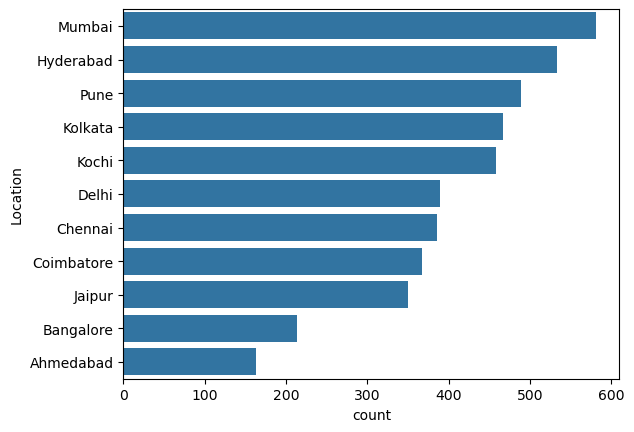

In [49]:
sns.countplot(budget_df["Location"],order=budget_df["Location"].value_counts().index)

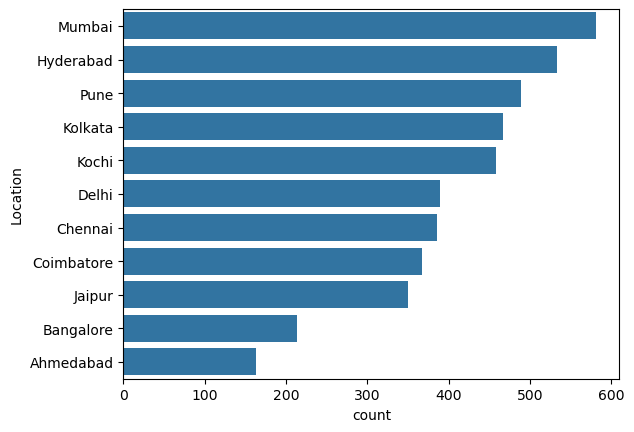

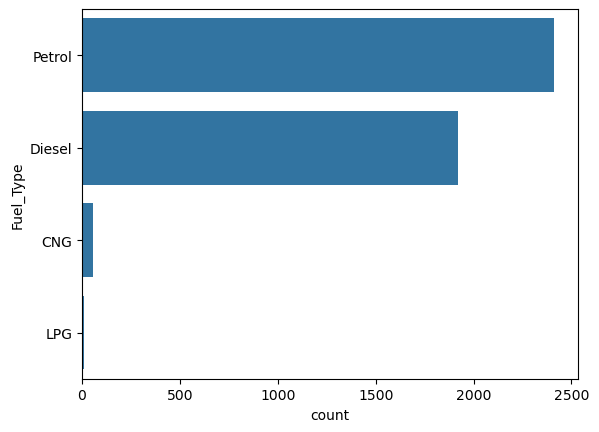

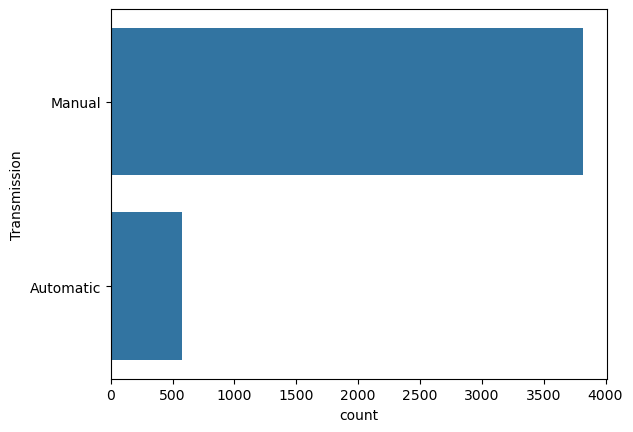

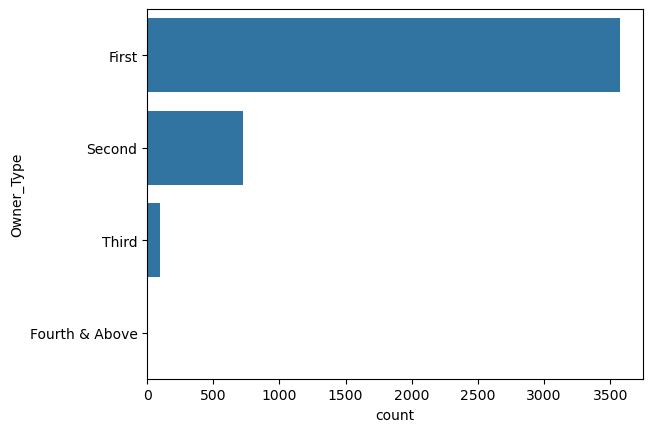

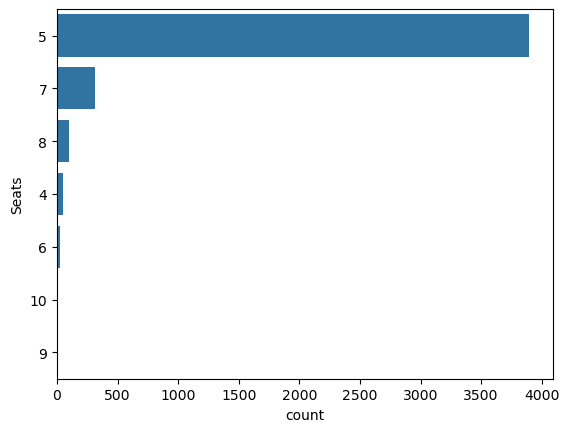

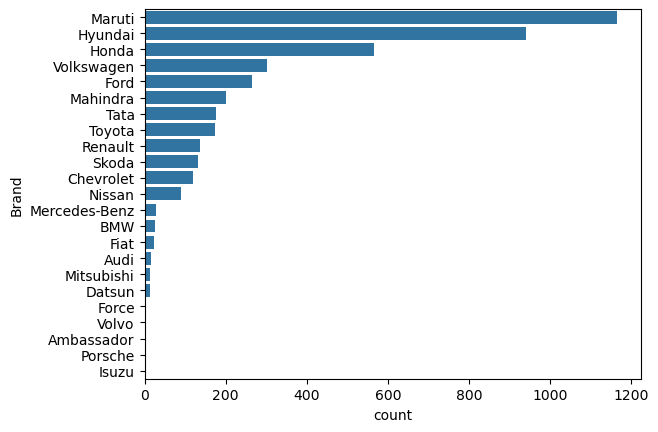

In [50]:
for clm in cat_colm:
    sns.countplot(budget_df[clm],order=budget_df[clm].value_counts().index)
    plt.show()
    

In [51]:
! pip install seaborn

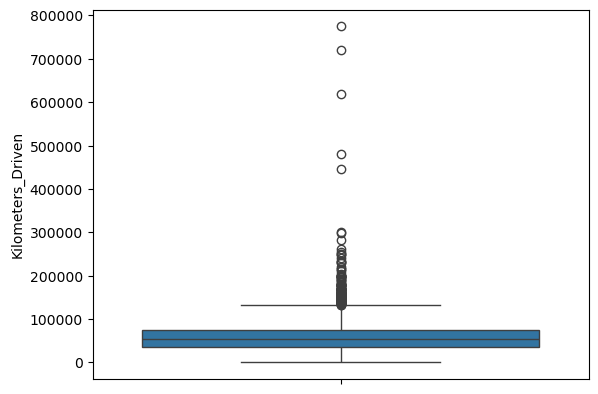

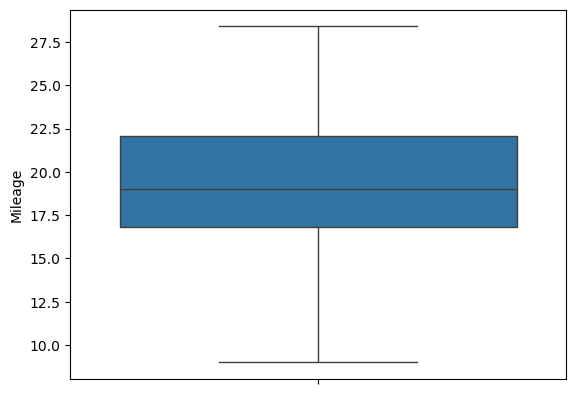

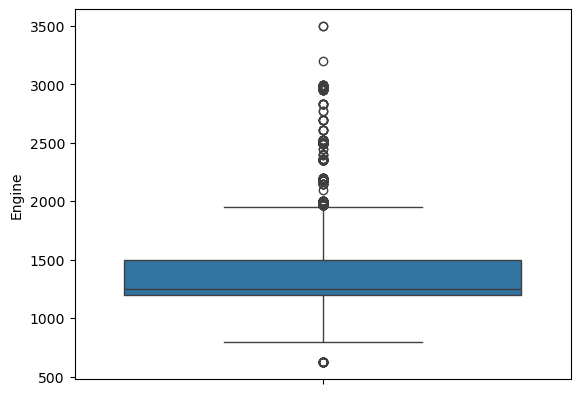

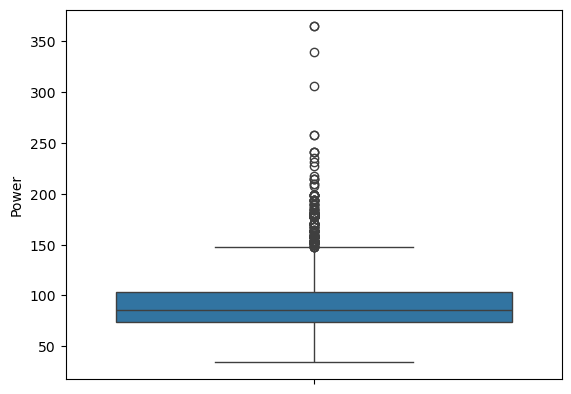

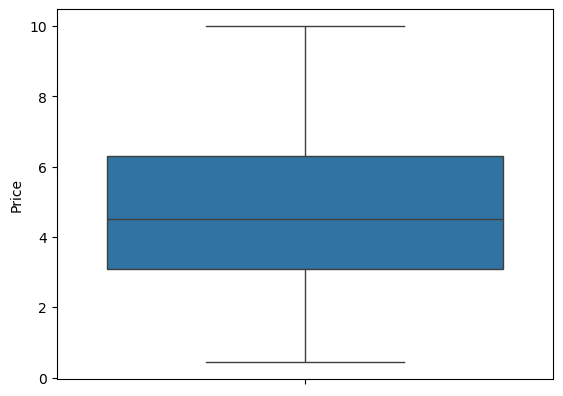

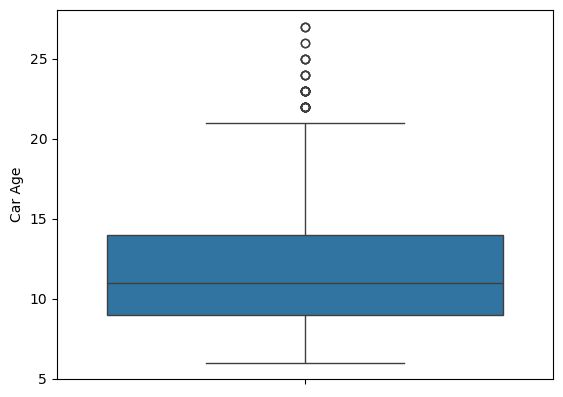

In [52]:
for clm in num_colm:
    sns.boxplot(budget_df[clm])
    plt.show()

In [53]:
for col in num_colm:
    Q1 = budget_df[col].quantile(0.25)
    Q3 = budget_df[col].quantile(0.75)
    IQR =  Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    budget_df = budget_df[(budget_df[col] >= lower_bound) &(budget_df[col] <= upper_bound)]

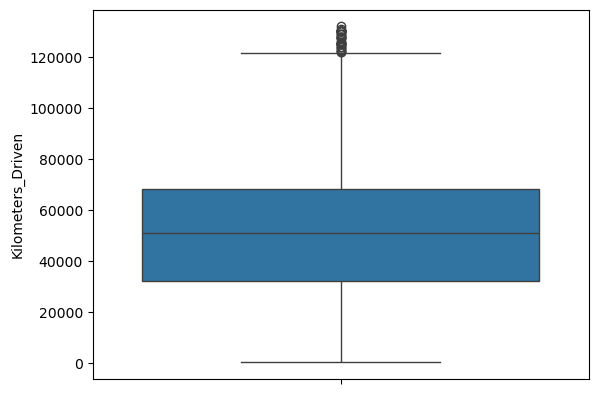

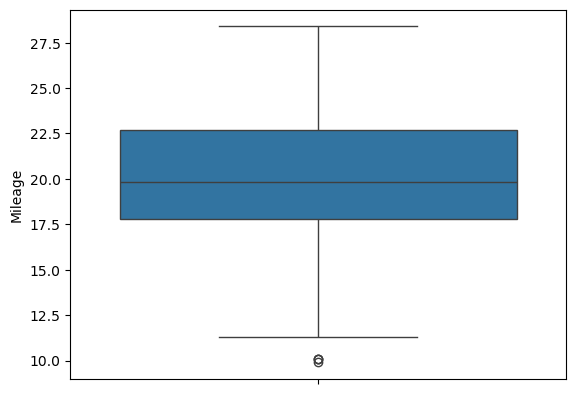

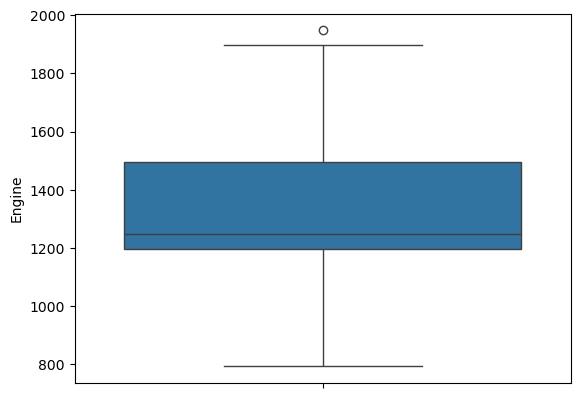

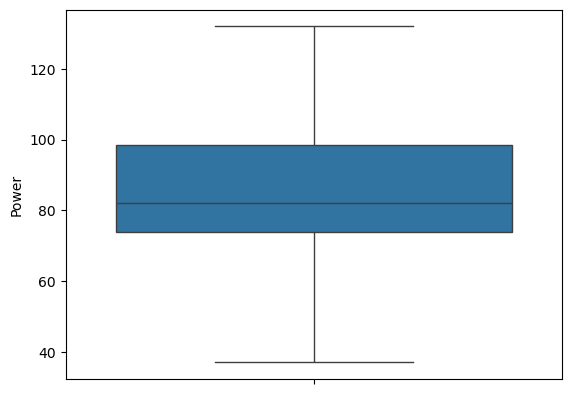

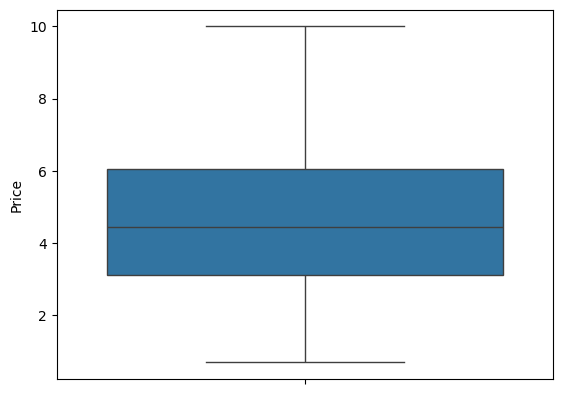

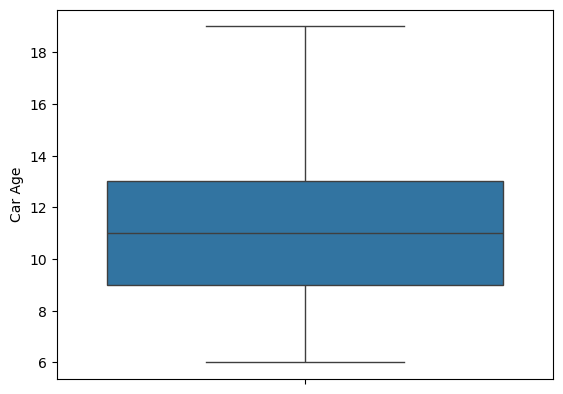

In [54]:
for col in  num_colm:
    sns.boxplot(budget_df[col])
    plt.show()

# Bivariate EDA

## bivariate include 3 types 

# 1: numerical vs numerical 
* a.scatter plot used to show relationship between two countinues variable
* b.pairplot matrix of scatter plot for multiple numerical columns 
# 2:categorical vs categorical 
* a.grouped bar plot use hue in sns count plot to create  group bar plot 
* b.staged bar plot create frequency table and plot it using pandas
# 3: numerical vs categorical 
* a.Box plot with hue
* b.violin plot

<Figure size 1200x800 with 0 Axes>

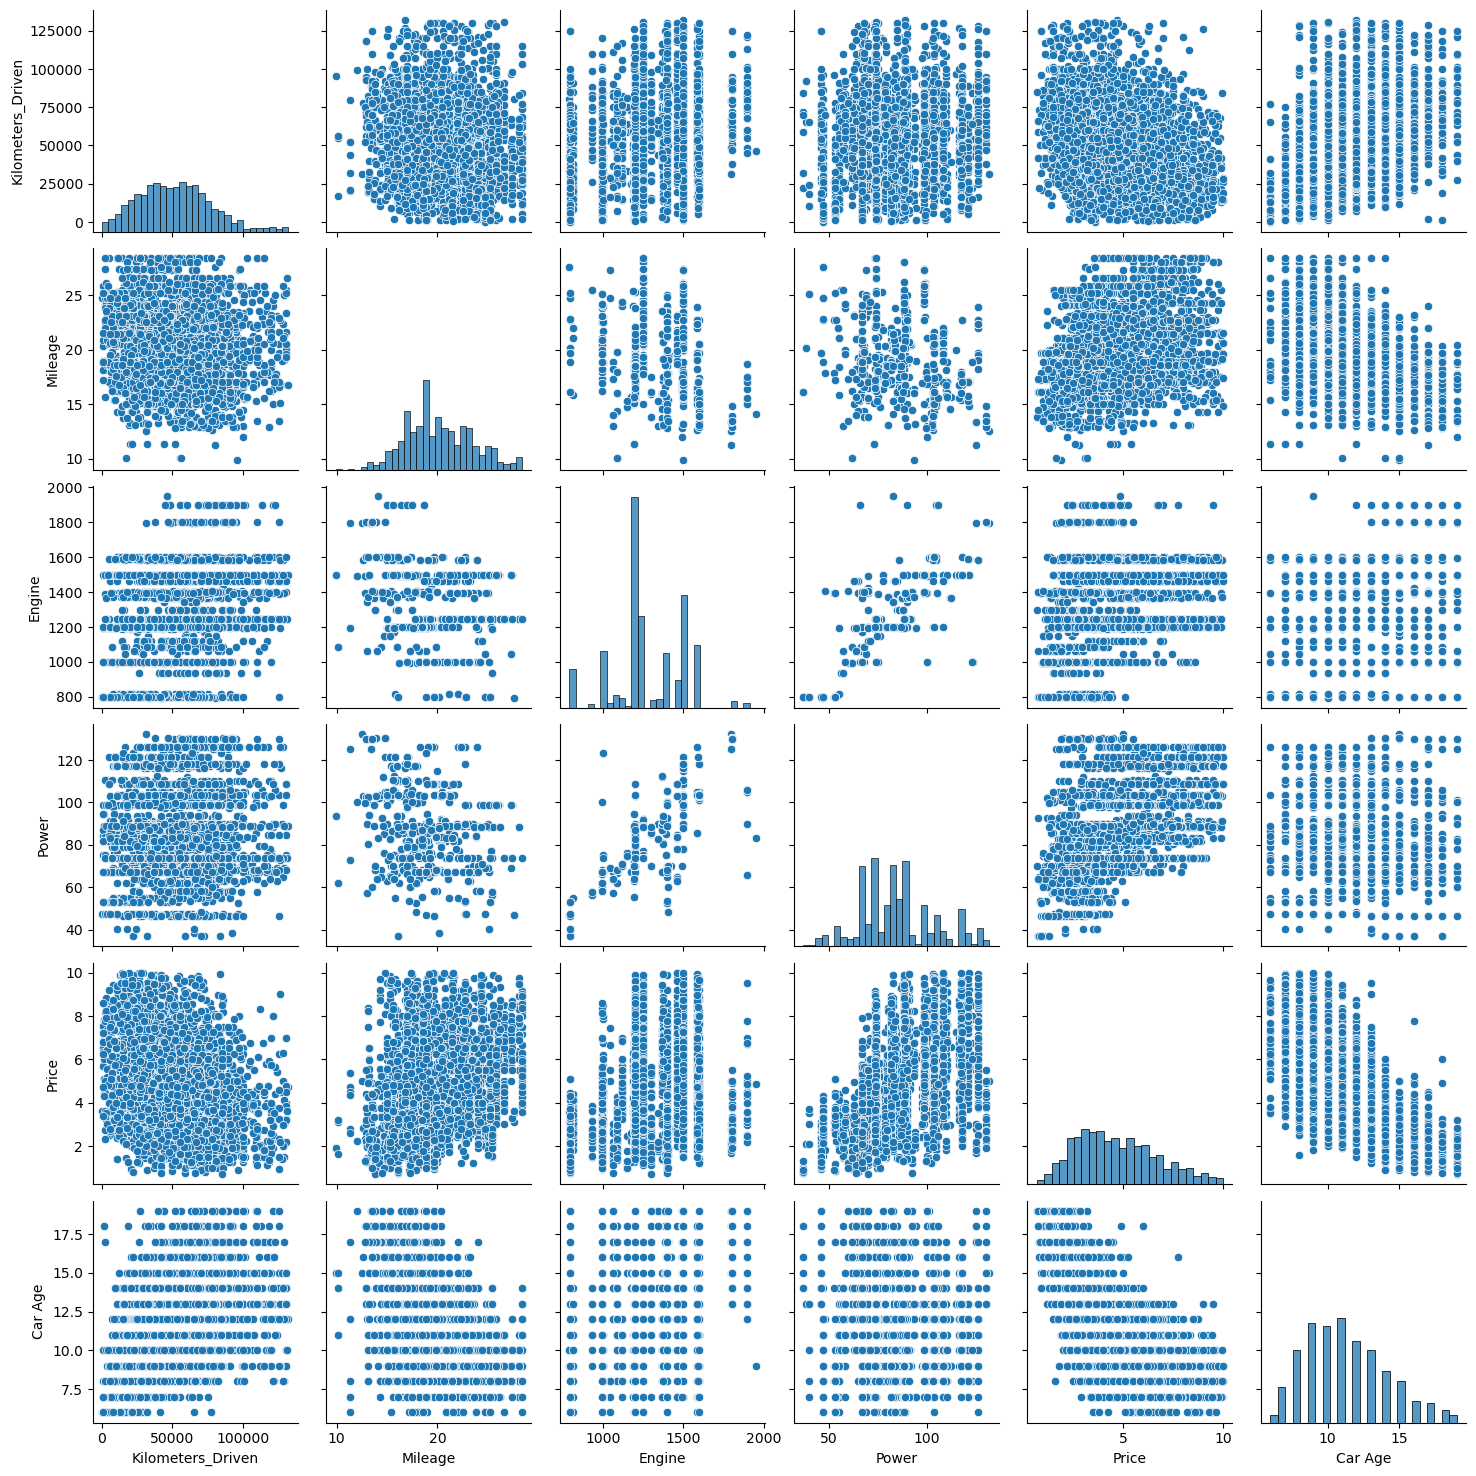

In [62]:
plt.figure(figsize=(12,8))
sns.pairplot(data=budget_df)
plt.show()

* Fristly  we are analysing the graph of Kilometere dirven and mileage it shows that the if a vehical is driven more kilometere the mileage of the vehical would be less as compare to its initial stage
* In the second analysis we are analysing Kilometer Driven and Engine in this thier is positivie corelation in it.
* The Third analysis Would be Power and Kilometer driven in this it seems as per the Engine , Power also have the positive corelation in it.
* In The price and Kilometer driven analysis the graph show the when the kilometer driven 

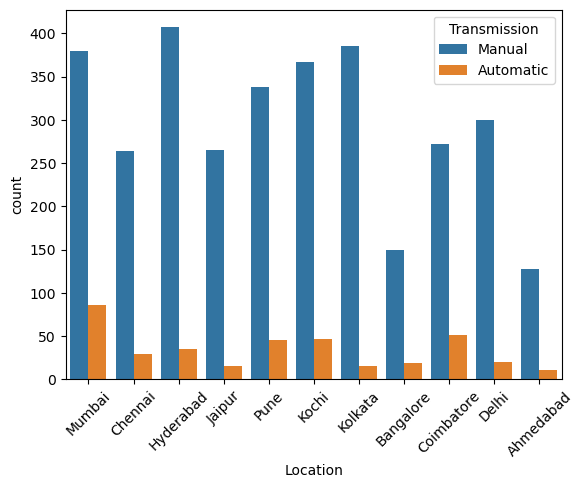

In [63]:
sns.countplot(data = budget_df, x = budget_df ["Location"], hue = "Transmission")
plt.xticks (rotation = 45)
plt.show()

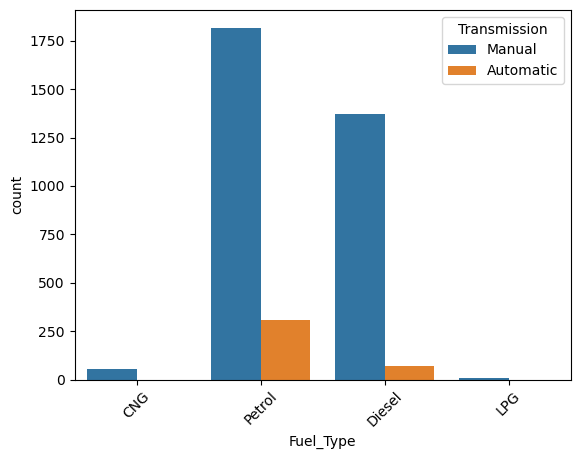

In [67]:
sns.countplot(data = budget_df, x = budget_df ["Fuel_Type"], hue = "Transmission")
plt.xticks (rotation = 45)
plt.show()

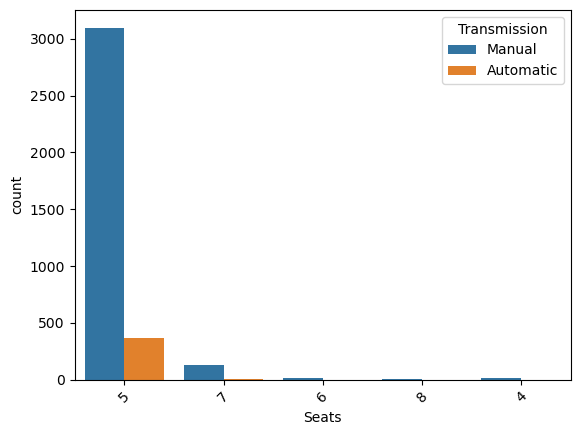

In [71]:
sns.countplot(data = budget_df, x = budget_df ["Seats"], hue = "Transmission")
plt.xticks (rotation = 45)
plt.show()

In [ ]:
plt.fugure(figsize=(12,8))
sns.boxplot()

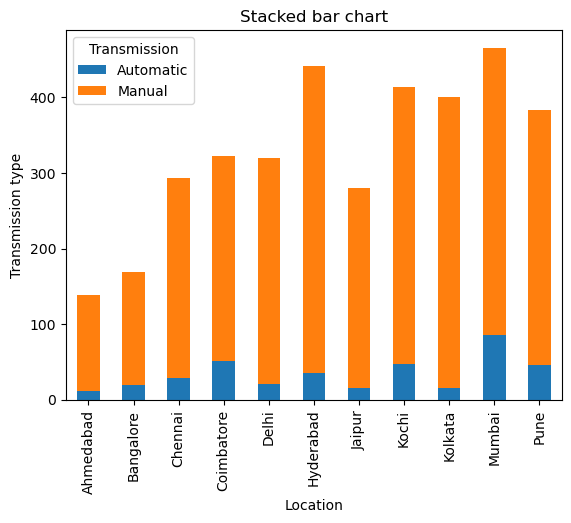

In [74]:
crosstab = pd.crosstab (budget_df ["Location"], budget_df["Transmission"])
crosstab.plot(kind = "bar", stacked=True)
plt.title("Stacked bar chart")
plt.xlabel("Location")
plt.ylabel("Transmission type")
plt.show()